In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
beta = 0.15
beta_f = 0.25
mu = 0.1
gamma = 0.125
sigma = 0.42
alpha = 0.28
lamb = 0.17
lamb_f = 0.27
tau = 0.01
omega = 0.05
kappa = 0.21
delta = 0.13
epsilon = 0.22
phi = 0.13
phi_f = 0.23

In [3]:
def n_update(n, mu):
    seeds = np.random.uniform(0, 1, np.int_(n))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[0] += 1
    return pop_update

def s_update(s, mu, beta, beta_f):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + beta + beta_f):
            pop_update[0] -= 1
            pop_update[1] += 1
    return pop_update

def i_update(i, mu, sigma, alpha, gamma):
    seeds = np.random.uniform(0, 1, np.int_(i))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[1] -= 1
        elif seed < (mu + sigma + alpha):
            pop_update[1] -= 1
            pop_update[2] += 1
        elif seed < (mu + sigma + alpha + gamma):
            pop_update[1] -= 1
            pop_update[3] += 1
    return pop_update

def r_update(r, mu):
    seeds = np.random.uniform(0, 1, np.int_(r))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
    return pop_update

def f_update(f, mu):
    seeds = np.random.uniform(0, 1, np.int_(f))
    pop_update = np.zeros(4)
    for seed in seeds:
        if seed < mu:
            pop_update[3] -= 1
    return pop_update

In [4]:
def base_model(init_pop, time, beta, beta_f, mu, gamma, sigma, alpha):
    pop = np.zeros([4, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        i = pop[1, t-1]
        r = pop[2, t-1]
        f = pop[3, t-1]

        n_change = n_update(n, mu)
        s_change = s_update(s, mu, beta, beta_f)
        i_change = i_update(i, mu, sigma, alpha, gamma)
        r_change = r_update(r, mu)
        f_change = f_update(f, mu)
        
        pop_change = n_change + s_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'i': pop[1,:],
        'r': pop[2,:],
        'f': pop[3,:],
    })
    return df

In [5]:
base = base_model(1000, 100, beta, beta_f, mu, gamma, sigma, alpha)
print(base)

     time       s      i      r      f
0       0  1000.0    0.0    0.0    0.0
1       1   616.0  398.0    0.0    0.0
2       2   427.0  272.0  273.0   54.0
3       3   301.0  202.0  427.0   95.0
4       4   255.0  130.0  526.0  112.0
..    ...     ...    ...    ...    ...
96     96   225.0   74.0  647.0  108.0
97     97   205.0   89.0  643.0  107.0
98     98   208.0   93.0  626.0  109.0
99     99   219.0   88.0  628.0  101.0
100   100   207.0   92.0  623.0  105.0

[101 rows x 5 columns]


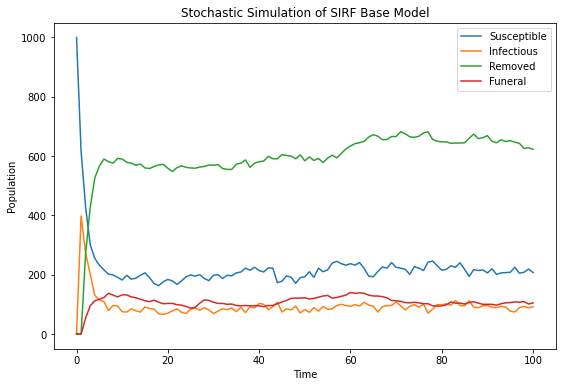

In [6]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=base, x="time", y="s", label="Susceptible")
sns.lineplot(data=base, x="time", y="i", label="Infectious")
sns.lineplot(data=base, x="time", y="r", label="Removed")
sns.lineplot(data=base, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SIRF Base Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");

In [7]:
def n_update(n, mu):
    seeds = np.random.uniform(0, 1, np.int_(n))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[0] += 1
    return pop_update

def s_update(s, mu, lamb, lamb_f):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + lamb + lamb_f):
            pop_update[0] -= 1
            pop_update[2] += 1
    return pop_update


def e_update(e, mu, beta, beta_f):
    pop_update = np.zeros(6)
    try:
        seeds = np.random.uniform(0, 1, np.int_(e))
    except ValueError:
        return pop_update
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
        elif seed < (mu + lamb + lamb_f):
            pop_update[2] -= 1
            pop_update[4] += 1
    return pop_update

def r_update(r, mu):
    seeds = np.random.uniform(0, 1, np.int_(r))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[3] -= 1
    return pop_update

def f_update(f, mu):
    seeds = np.random.uniform(0, 1, np.int_(f))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[5] -= 1
    return pop_update

def i_update(i, mu, sigma, alpha, gamma, kappa):
    seeds = np.random.uniform(0, 1, np.int_(i))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[4] -= 1
        elif seed < (mu + sigma + alpha):
            pop_update[4] -= 1
            pop_update[3] += 1
        elif seed < (mu + sigma + alpha + gamma):
            pop_update[4] -= 1
            pop_update[5] += 1
        elif seed < (mu + sigma + alpha + gamma + kappa):
            pop_update[4] -= 1
            pop_update[1] += 1
    return pop_update


def h_update(h, mu, delta, tau, omega):
    seeds = np.random.uniform(0, 1, np.int_(h))
    pop_update = np.zeros(6)
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
        elif seed < (mu + delta):
            pop_update[2] -= 1
            pop_update[5] += 1
        elif seed < (mu + delta + tau + omega):
            pop_update[2] -= 1
            pop_update[3] +=1
    return pop_update

In [8]:
def sherif_model(init_pop, time, beta, beta_f, lamb, lamb_f, mu, gamma, sigma, alpha, kappa, delta, tau, omega):
    
    pop = np.zeros([6, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        h = pop[1, t-1]
        e = pop[2, t-1]
        r = pop[3, t-1]
        i = pop[4, t-1]
        f = pop[5, t-1]

        n_change = n_update(n, mu)
        s_change = s_update(s, mu, lamb, lamb_f)
        h_change = h_update(h, mu, delta, tau, omega)
        e_change = e_update(e, mu, beta, beta_f)
        r_change = r_update(r, mu)
        i_change = i_update(i, mu, sigma, alpha, gamma, kappa)
        f_change = f_update(f, mu)
        
        pop_change = n_change + s_change + h_change + e_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'h': pop[1,:],
        'e': pop[2,:],
        'r': pop[3,:],
        'i': pop[4,:],
        'f': pop[5,:],

    })
    return df

In [9]:
sherif = sherif_model(1000, 100, beta, beta_f, lamb, lamb_f, mu, gamma, 
                      sigma, alpha, kappa, delta, tau, omega)
print(sherif)

     time       s      h      e      r      i      f
0       0  1000.0    0.0    0.0    0.0    0.0    0.0
1       1   586.0    0.0  426.0    0.0    0.0    0.0
2       2   398.0    0.0  443.0    0.0  194.0    0.0
3       3   282.0   14.0  384.0  140.0  196.0   25.0
4       4   238.0   30.0  283.0  262.0  166.0   54.0
..    ...     ...    ...    ...    ...    ...    ...
96     96   201.0  251.0   12.0  238.0    0.0  338.0
97     97   205.0  251.0   14.0  228.0    6.0  340.0
98     98   198.0  252.0   19.0  225.0    7.0  332.0
99     99   203.0  252.0    9.0  223.0   10.0  341.0
100   100   204.0  253.0   11.0  233.0    8.0  348.0

[101 rows x 7 columns]


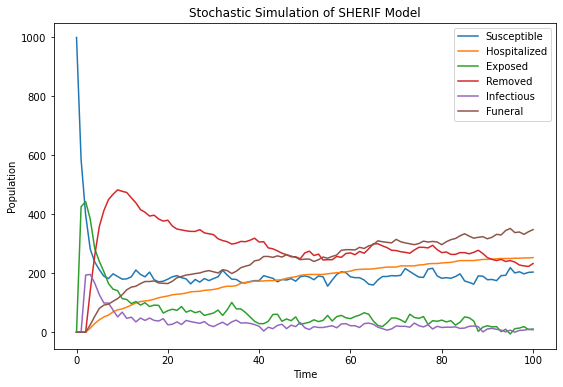

In [10]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=sherif, x="time", y="s", label="Susceptible")
sns.lineplot(data=sherif, x="time", y="h", label="Hospitalized")
sns.lineplot(data=sherif, x="time", y="e", label="Exposed")
sns.lineplot(data=sherif, x="time", y="r", label="Removed")
sns.lineplot(data=sherif, x="time", y="i", label="Infectious")
sns.lineplot(data=sherif, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SHERIF Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");

In [11]:
def n_update(n, mu):
    seeds = np.random.uniform(0, 1, np.int_(n))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[0] += 1
    return pop_update

def s_update(s, mu, beta, beta_f, epsilon):
    seeds = np.random.uniform(0, 1, np.int_(s))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[0] -= 1
        elif seed < (mu + beta + beta_f):
            pop_update[0] -= 1
            pop_update[2] += 1
        elif seed < (mu + beta + beta_f + epsilon):
            pop_update[0] -= 1
            pop_update[1] += 1
    return pop_update

def v_update(v, mu, phi, phi_f):
    seeds = np.random.uniform(0, 1, np.int_(v))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[1] -= 1
        elif seed < (mu + phi + phi_f):
            pop_update[1] -= 1
            pop_update[2] += 1
    return pop_update

def i_update(i, mu, sigma, alpha, gamma):
    seeds = np.random.uniform(0, 1, np.int_(i))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[2] -= 1
        elif seed < (mu + sigma + alpha):
            pop_update[2] -= 1
            pop_update[4] += 1
        elif seed < (mu + sigma + alpha + gamma):
            pop_update[2] -= 1
            pop_update[3] += 1
    return pop_update

def r_update(r, mu):
    seeds = np.random.uniform(0, 1, np.int_(r))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[4] -= 1
    return pop_update

def f_update(f, mu):
    seeds = np.random.uniform(0, 1, np.int_(f))
    pop_update = np.zeros(5)
    for seed in seeds:
        if seed < mu:
            pop_update[3] -= 1
    return pop_update

In [12]:
def svifr_model(init_pop, time, beta, beta_f, phi, phi_f, mu, gamma, sigma, alpha, epsilon):
    
    pop = np.zeros([5, time+1])
    pop[0,0] = init_pop
    for t in range(1, time+1):
        n = np.sum(pop, axis=0)[t-1]
        s = pop[0, t-1]
        v = pop[1, t-1]
        i = pop[2, t-1]
        f = pop[3, t-1]
        r = pop[4, t-1]

        n_change = n_update(n, mu)
        s_change = s_update(s, mu, beta, beta_f, epsilon)
        v_change = v_update(v, mu, phi, phi_f)
        i_change = i_update(i, mu, sigma, alpha, gamma)
        r_change = r_update(r, mu)
        f_change = f_update(f, mu)
        
        pop_change = n_change + s_change + v_change + i_change + r_change + f_change
        pop[:,t] = np.add(pop[:,t-1], pop_change)
        
    df = pd.DataFrame({
        'time': np.arange(time+1),
        's': pop[0,:],
        'v': pop[1,:],
        'i': pop[2,:],
        'r': pop[3,:],
        'f': pop[4,:],

    })
    return df

In [13]:
svifr = svifr_model(1000, 100, beta, beta_f, phi, phi_f, mu, gamma, sigma, alpha, epsilon)
print(svifr)

     time       s      v      i     r      f
0       0  1000.0    0.0    0.0   0.0    0.0
1       1   392.0  210.0  387.0   0.0    0.0
2       2   200.0  197.0  257.0  50.0  266.0
3       3   163.0  167.0  154.0  77.0  431.0
4       4   144.0  128.0  130.0  95.0  489.0
..    ...     ...    ...    ...   ...    ...
96     96   124.0   47.0   56.0  76.0  431.0
97     97   100.0   57.0   81.0  77.0  427.0
98     98   103.0   54.0   59.0  82.0  450.0
99     99   102.0   50.0   58.0  84.0  445.0
100   100   111.0   38.0   67.0  80.0  439.0

[101 rows x 6 columns]


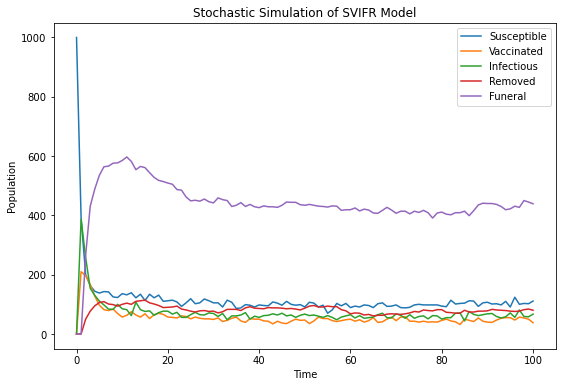

In [14]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=svifr, x="time", y="s", label="Susceptible")
sns.lineplot(data=svifr, x="time", y="v", label="Vaccinated")
sns.lineplot(data=svifr, x="time", y="i", label="Infectious")
sns.lineplot(data=svifr, x="time", y="r", label="Removed")
sns.lineplot(data=svifr, x="time", y="f", label="Funeral")
plt.title('Stochastic Simulation of SVIFR Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc = "upper right");